In [3]:
import xarray as xr
import pandas as pd
import numpy as np


# Dataframe

In [4]:
dailydata=xr.open_dataset(r'C:\Users\Harshit Jain\Desktop\delhiaq\daily_data.nc')
df=dailydata.to_dataframe()

df.columns = df.columns.str.lower()
df.rename(columns={'Date':'date','pm2.5':'pm25','ozone':'o3','tot-rf':'totrf'}, inplace=True)
df = df[df['station'] == 'Wazirpur, Delhi - DPCC'] 
#df=df[df['date']=='2022-08-23']
print(df)


                      station       date   latitude  longitude        pm25  \
index                                                                        
13376  Wazirpur, Delhi - DPCC 2022-01-01  28.699793  77.165453  287.269231   
13377  Wazirpur, Delhi - DPCC 2022-01-02  28.699793  77.165453  307.791667   
13378  Wazirpur, Delhi - DPCC 2022-01-03  28.699793  77.165453  310.250000   
13379  Wazirpur, Delhi - DPCC 2022-01-04  28.699793  77.165453  301.187500   
13380  Wazirpur, Delhi - DPCC 2022-01-05  28.699793  77.165453  317.885417   
...                       ...        ...        ...        ...         ...   
13736  Wazirpur, Delhi - DPCC 2022-12-27  28.699793  77.165453  232.427083   
13737  Wazirpur, Delhi - DPCC 2022-12-28  28.699793  77.165453  182.781250   
13738  Wazirpur, Delhi - DPCC 2022-12-29  28.699793  77.165453  256.239583   
13739  Wazirpur, Delhi - DPCC 2022-12-30  28.699793  77.165453  325.378333   
13740  Wazirpur, Delhi - DPCC 2022-12-31  28.699793  77.165453  

# Enhancement

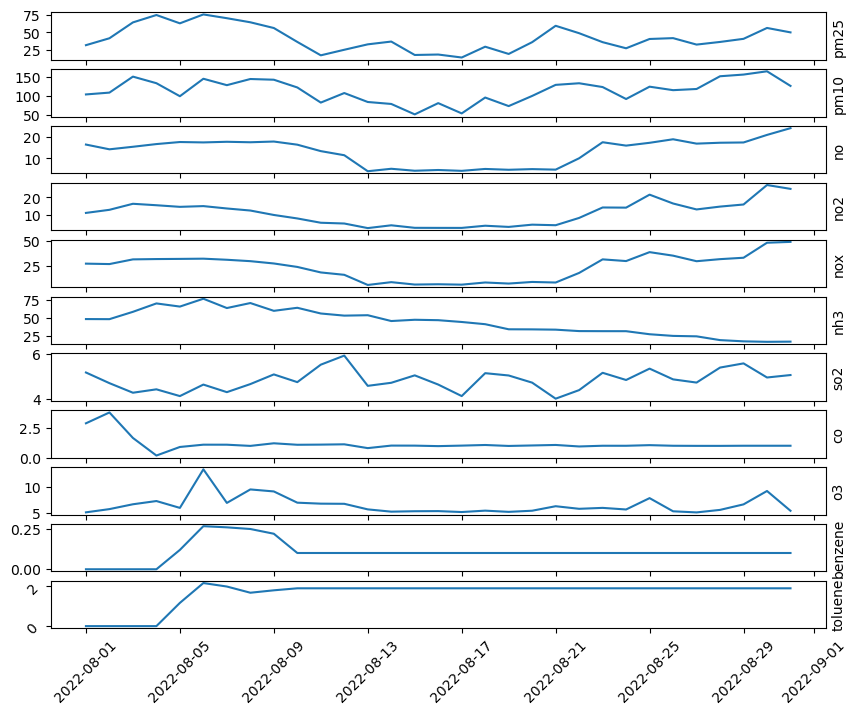

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

def timePlot(df, year, month,  pollutants=["pm25", "pm10"]):
    # Cuts the df down to the month specified
    df.index = pd.to_datetime(df.date)
    df_n_1 = df[(df.index.month == int(month)) & (df.index.year == int(year))]
    #print(df_n_1)

    fig, axs = plt.subplots(len(pollutants), 1, figsize=(10, 8), sharex=True)

    for ax, pollutant in zip(axs, pollutants):
        values = df_n_1[pollutant]
        

        # plotting
        ax.plot(values.index, values.values)
        ax.yaxis.set_label_position("right") 
        ax.set_ylabel(pollutant)
        plt.xticks(rotation=45)
        plt.yticks(rotation=45)


timePlot(df, 2022, 8, pollutants=['pm25', 'pm10', 'no', 'no2', 'nox', 'nh3', 'so2', 'co', 'o3', 'benzene', 'toluene'])

  
